**SVM**

Importing libraries

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading dataset

In [235]:
df = pd.read_csv("/content/cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Data Visualization

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Clump'}>,
        <Axes: title={'center': 'UnifSize'}>],
       [<Axes: title={'center': 'UnifShape'}>,
        <Axes: title={'center': 'MargAdh'}>,
        <Axes: title={'center': 'SingEpiSize'}>],
       [<Axes: title={'center': 'BlandChrom'}>,
        <Axes: title={'center': 'NormNucl'}>,
        <Axes: title={'center': 'Mit'}>],
       [<Axes: title={'center': 'Class'}>, <Axes: >, <Axes: >]],
      dtype=object)

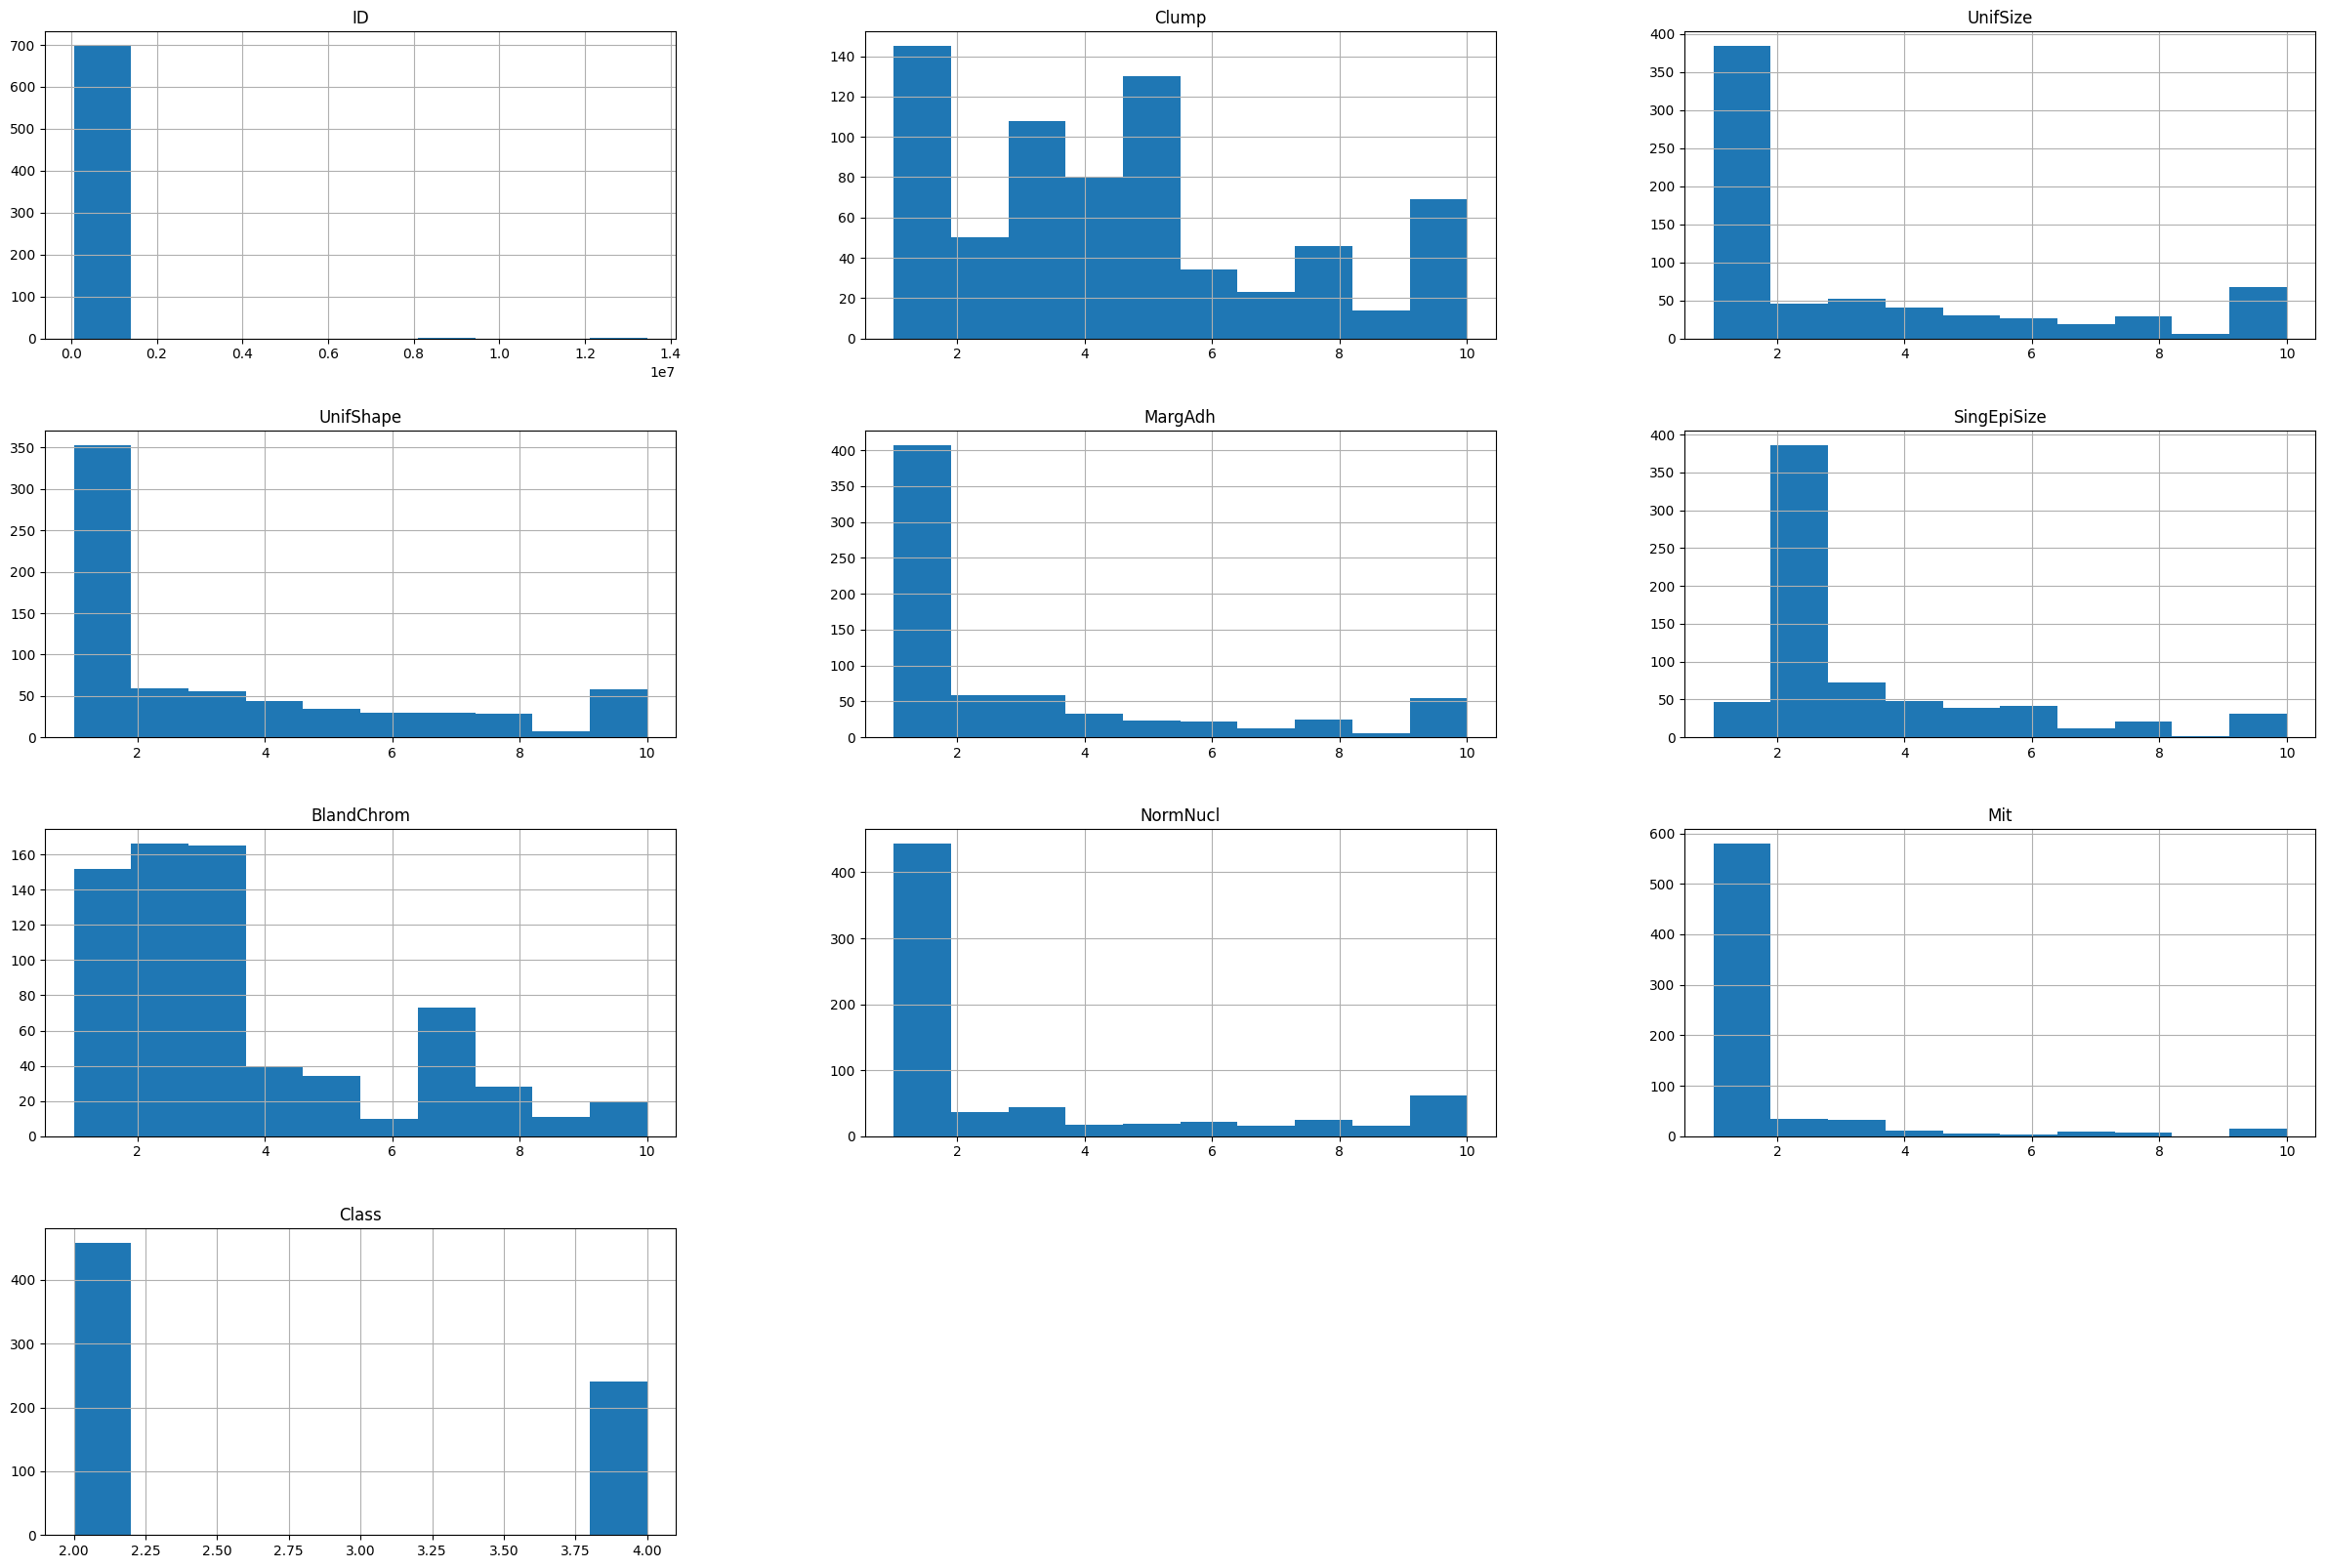

In [236]:
df.hist(figsize=(30, 20))

Step 1: Data Preprocessing


In [237]:
df['Class'].value_counts()

,count
Class,
2,458
4,241


In [245]:
df.replace('?', np.nan, inplace=True)

In [246]:
df.dropna(inplace=True)

Feature and Target Selection

In [247]:
X = df.drop('Class', axis=1).values
y = df['Class'].values

Normalization

In [248]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

Step 2: Train/test split

In [249]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 3: Algorithm Setup

SVM

In [250]:
from sklearn import svm
model = svm.SVC(kernel='rbf')

Step 4: Model Fitting

In [251]:
model.fit(X_train, y_train)

SVC()

Model Predict

In [253]:
y_pred = model.predict(X_test)

Step 6: Evaluation

In [254]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"SVM Regresson Accuracy: {accuracy}")
print(f"\nClassification Report:\n {classification_report(y_test, y_pred)}")
print(f"\nConfusion Matrix:\n {confusion_matrix(y_test, y_pred)}")

SVM Regresson Accuracy: 95.62043795620438

Classification Report:
               precision    recall  f1-score   support

           2       0.96      0.96      0.96        79
           4       0.95      0.95      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137


Confusion Matrix:
 [[76  3]
 [ 3 55]]
